In [ ]:
pip install prophet

     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 184kB 17.6MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639487 sha256=ecb0cacefa743ba2db54ba42a51103475273a796ecd50162f68f59f99dfe9a60
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import pandas as pd
import prophet as Prophet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AML_exam.txt to AML_exam (1).txt


In [ ]:
df = pd.read_csv('AML_exam.txt',sep='\t',header=(0))

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['ds'] = pd.to_datetime(df['datetime'],format='%Y%m%d%H%M%S')
df['y'] = df['speed']

In [ ]:
df_p = df[['ds','y']]

In [ ]:
df_p.head()

,ds,y
16500,2016-11-18 12:00:00,2.098724
16501,2016-11-18 13:00:00,1.570473
16502,2016-11-18 14:00:00,2.194121
16503,2016-11-18 15:00:00,1.308761
16504,2016-11-18 16:00:00,0.522000


In [ ]:
m = Prophet.Prophet()
m.fit(df_p)

In [ ]:
future = m.make_future_dataframe(periods=365, freq='H')
future.tail()

,ds
18909,2019-01-16 00:00:00
18910,2019-01-16 01:00:00
18911,2019-01-16 02:00:00
18912,2019-01-16 03:00:00
18913,2019-01-16 04:00:00


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18909,2019-01-16 00:00:00,1.365914,0.353459,2.345806
18910,2019-01-16 01:00:00,1.398889,0.279337,2.370847
18911,2019-01-16 02:00:00,1.412723,0.350725,2.412571
18912,2019-01-16 03:00:00,1.441919,0.370719,2.488449
18913,2019-01-16 04:00:00,1.493604,0.527377,2.589718


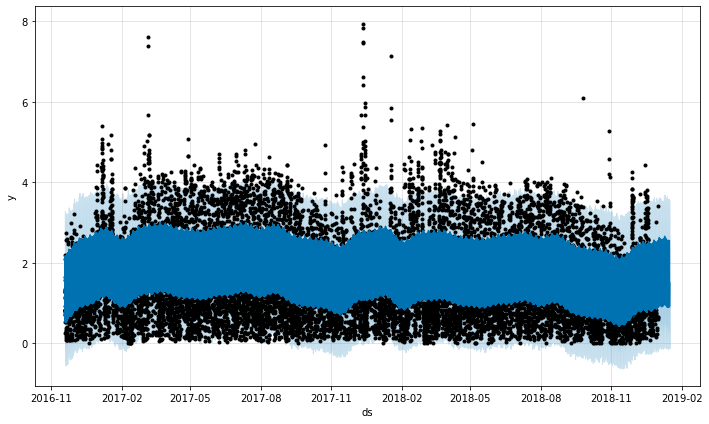

In [ ]:
figfore = m.plot(forecast)

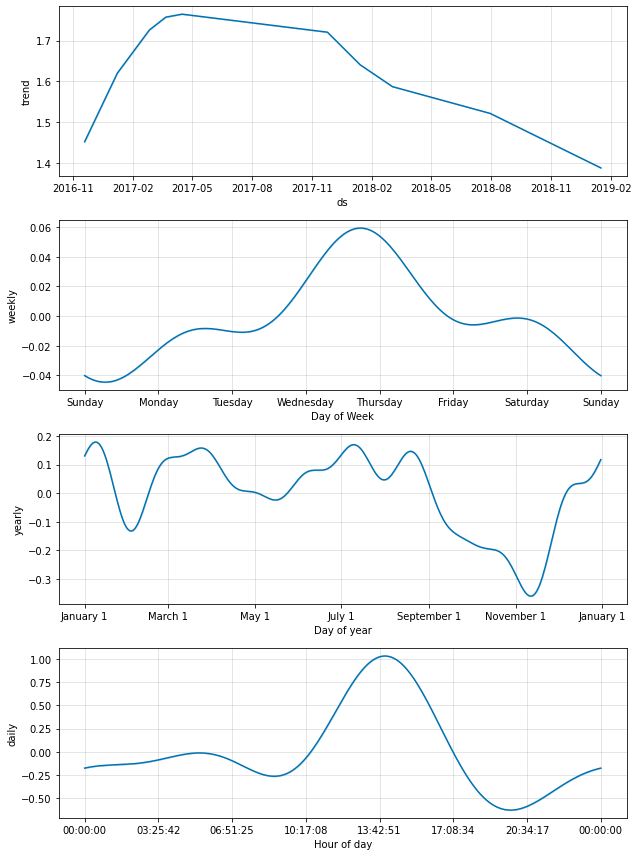

In [ ]:
figseasonaliy = m.plot_components(forecast)